In [1]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
# Import classifier models
from sklearn.linear_model import LogisticRegression # Logistic Regression
from sklearn.naive_bayes import GaussianNB # Naïve Bayes
from sklearn.linear_model import SGDClassifier # Stochastic Gradient Descent
from sklearn.neighbors import KNeighborsClassifier # K-Nearest Neighbors
from sklearn.tree import DecisionTreeClassifier # Decision Tree
from sklearn.ensemble import RandomForestClassifier # Random Forest
from sklearn.svm import SVC # Support Vector Classifier
from sklearn.neural_network import MLPClassifier # Neural Network
from sklearn.ensemble import AdaBoostClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import time
import pickle
import imageio  # for animation
try:
    os.mkdir('./figures')
except:
    pass

In [6]:
def make_data(n_samples,noise,shift):
    data,label = make_moons(n_samples=n_samples,noise=noise)
    x = data[:,0]
    y = data[:,1]

    df = pd.DataFrame(columns=['x','y','label'])
    df['x'] = data[:,0]
    df['y'] = data[:,1]
    df['label'] = label
    
    df['x'] = np.where(df['label'] == 0,df['x'],df['x'] + shift)
    
    return df

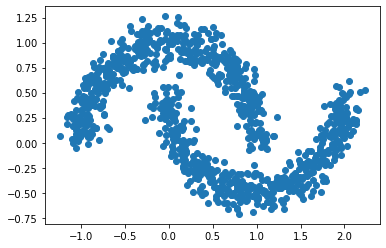

In [7]:
df = make_data(n_samples=1000,noise=0.1,shift=0.0)
plt.scatter(df['x'],df['y'])
plt.show()

lr, knn, dt, svm, nb

In [4]:
nb=GaussianNB()
lr=LogisticRegression()
sgd=SGDClassifier(max_iter=2000)
knn=KNeighborsClassifier()
dt=DecisionTreeClassifier()
rfm=RandomForestClassifier()
svm=SVC()
nn=MLPClassifier(max_iter=2000)
ab=AdaBoostClassifier()
qda=QuadraticDiscriminantAnalysis()

In [5]:
clsfrs = [[nb,'Naive Bayes'],
          [dt,'Decision Tree'],
          [knn,'K Nearest Neighbors'],
          [svm,'Support Vector Machine'],
          [lr,'Logistic Regression'],
          [sgd,'Stochastic Gradient Descent'],
          [rfm,'Random Forest Classifier'],
          [nn,'Neural Network'],
          [ab,'AdaBoost'],
          [qda,'Quadratic Discriminant Analysis']
         ]

for j, (clf, name) in enumerate(clsfrs):
    figpath = './figures/Sup_'+name
    try:
        os.mkdir(figpath)
    except:
        pass

colors = np.array(['orange','blue'])
xlim = [-2,5];   x_min,x_max = xlim
ylim = [-1,1.5]; y_min,y_max = ylim
step = 0.02
xx, yy = np.meshgrid(np.arange(x_min, x_max+step, step), \
                     np.arange(y_min, y_max+step, step))
cm = plt.cm.RdBu

for i,s in enumerate(np.linspace(2,0,80)):
    df = make_data(n_samples=2000,noise=0.1,shift=s)
    Xtrain, Xtest, ytrain, ytest = train_test_split(df[['x','y']],
                                                    df['label'],
                                                    test_size = 0.2)
    for j, (clf, name) in enumerate(clsfrs):
        figname = './figures/Sup_'+name+'/'+str(10+i)+'.png'

        # fit
        t0 = time.time()
        clf.fit(Xtrain,ytrain)
        tfit = time.time()-t0
        # predict
        t0 = time.time()
        yp = clf.predict(Xtest)
        tpred = time.time()-t0
        # size
        pickle.dump(clf,open('size.pkl','wb'))
        kb = int(os.path.getsize('size.pkl'))
        os.remove('size.pkl')
        
        # Mismatches red
        match = np.where(yp!=ytest.values,0,1)
        
        accuracy = accuracy_score(yp,ytest)
        
        plt.figure(0,figsize=(4,4))
        plt_data = pd.DataFrame(columns=['x','y','color','marker'])
        plt_data['x'] = Xtest['x']
        plt_data['y'] = Xtest['y']
        plt_data['color'] = yp
        plt_data['marker'] = match

        # contour plot
        if hasattr(clf, "decision_function"):
            z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
        z = z.reshape(xx.shape)
        plt.contourf(xx, yy, z, cmap=cm, alpha=0.7)        
        
        plt.scatter(plt_data[plt_data['marker']==1]['x'],
                    plt_data[plt_data['marker']==1]['y'],
                    color = colors[plt_data[plt_data['marker']==1]['color']],
                    marker = '.'
                   )
        
        plt.scatter(plt_data[plt_data['marker']==0]['x'],
                    plt_data[plt_data['marker']==0]['y'],
                    color = colors[plt_data[plt_data['marker']==0]['color']],
                    edgecolors='k',
                    marker = 'x'
                   )
        
        plt.text(1.8,1.35,'Train: %.4f s'%(tfit))
        plt.text(1.8,1.20,'Predict: %.4f s'%(tpred))
        if kb<1024:
            plt.text(1.8,1.05,'Size: %.0f Bytes'%(kb))
        else:
            plt.text(1.8,1.05,'Size: %.0f kB'%(kb/1024.0))            
        plt.text(1.8,0.90,'Accuracy: %.0f%%'%(accuracy*100))
        plt.xlim([-2,5])
        plt.ylim([-1,1.5])
        plt.title(name)
        plt.tight_layout()
        plt.savefig(figname,dpi=300)
        plt.close()

In [6]:
n = 80
for j, (clf, name) in enumerate(clsfrs):
    images = []
    for i in range(n):
        filename = './figures/Sup_'+name+'/'+str(10+i)+'.png'
        images.append(imageio.imread(filename))
    if images!=[]:
        imageio.mimsave('./figures/Sup_'+name+'.mp4', images)

In [2]:
# Unsupervised
from sklearn.cluster import KMeans, DBSCAN, SpectralClustering
from sklearn.mixture import GaussianMixture

km = KMeans(n_clusters=2)
gm = GaussianMixture(n_components=2)
dbs = DBSCAN(eps=0.15)
sc = SpectralClustering(n_clusters=2)

In [8]:
clsfrs = [[km,'K Means'],
          [gm,'Gaussian Mixture Model'],
          [sc,'Spectral Clustering'],
          [dbs,'DBSCAN']
         ]

colors = np.array(['orange','blue','green','purple'])
markers = np.array(['x','.'])

for j, (clf, name) in enumerate(clsfrs):
    figpath = './figures/Unsup_'+name
    try:
        os.mkdir(figpath)
    except:
        pass

colors = np.array(['orange','blue','green','purple'])
xlim = [-2,5];   x_min,x_max = xlim
ylim = [-1,1.5]; y_min,y_max = ylim
step = 0.02
xx, yy = np.meshgrid(np.arange(x_min, x_max+step, step), \
                     np.arange(y_min, y_max+step, step))
cm = plt.cm.RdBu

for i,s in enumerate(np.linspace(2,0,80)):
    df = make_data(n_samples=2000,noise=0.1,shift=s)
    Xtrain, Xtest, ytrain, ytest = train_test_split(df[['x','y']],
                                                    df['label'],
                                                    test_size = 0.2)
    for j, (clf, name) in enumerate(clsfrs):
        figname = './figures/Unsup_'+name+'/'+str(10+i)+'.png'

        # fit
        t0 = time.time()
        clf.fit(Xtrain,ytrain)
        tfit = time.time()-t0
        # predict
        t0 = time.time()
        if hasattr(clf,'predict'):
            yp = clf.predict(Xtest)
        else:
            yp = clf.fit_predict(Xtest)
        tpred = time.time()-t0
        # size
        pickle.dump(clf,open('size.pkl','wb'))
        kb = int(os.path.getsize('size.pkl'))
        os.remove('size.pkl')
                    
        # Mismatches red
        match = np.where(yp!=ytest.values,0,1)
        
        accuracy = accuracy_score(yp,ytest)
        
        plt.figure(0,figsize=(4,4))
        plt_data = pd.DataFrame(columns=['x','y','color','marker'])
        plt_data['x'] = Xtest['x']
        plt_data['y'] = Xtest['y']
        plt_data['color'] = yp
        plt_data['marker'] = match

        # contour plot
        skip = False
        if hasattr(clf, "decision_function"):
            z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        elif hasattr(clf, "predict_proba"):
            z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
        elif hasattr(clf, "predict"):
            z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        else:
            skip = True # for Spectral Clustering
            #z = clf.fit_predict(np.c_[xx.ravel(), yy.ravel()])

        # skip contour plot for certain methods
        if not skip:
            z = z.reshape(xx.shape)
            plt.contourf(xx, yy, z, cmap=cm, alpha=0.7)        
        
        try:
            clr = colors[min(3,plt_data[plt_data['marker']==1]['color'])],
        except:
            clr = 'orange'
        plt.scatter(plt_data[plt_data['marker']==1]['x'],
                    plt_data[plt_data['marker']==1]['y'],
                    color = clr,
                    marker = '.'
                   )
        
        try:
            clr = colors[min(3,plt_data[plt_data['marker']==0]['color'])],
        except:
            clr = 'orange'
        plt.scatter(plt_data[plt_data['marker']==0]['x'],
                    plt_data[plt_data['marker']==0]['y'],
                    color = clr,
                    edgecolors='k',
                    marker = 'x'
                   )
        
        plt.text(1.8,1.35,'Train: %.4f s'%(tfit))
        plt.text(1.8,1.20,'Predict: %.4f s'%(tpred))
        if kb<1024:
            plt.text(1.8,1.05,'Size: %.0f Bytes'%(kb))
        else:
            plt.text(1.8,1.05,'Size: %.0f kB'%(kb/1024.0))            
        plt.text(1.8,0.90,'Accuracy: %.0f%%'%(accuracy*100))
        plt.xlim([-2,5])
        plt.ylim([-1,1.5])
        plt.title(name)
        plt.tight_layout()
        plt.savefig(figname,dpi=300)
        plt.close()

In [9]:
n = 80
for j, (clf, name) in enumerate(clsfrs):
    images = []
    for i in range(n):
        filename = './figures/Unsup_'+name+'/'+str(10+i)+'.png'
        images.append(imageio.imread(filename))
    if images!=[]:
        imageio.mimsave('./figures/Unsup_'+name+'.mp4', images)